# Customer Segmentation Analysis with Unsupervised Learning for former-students of the automotive bodywork and painting course.

![image](http://denary.wpengine.com/wp-content/uploads/2014/07/picture_market_segmentation-10-4-13-resized-600.png)

The following code represents the process to make a customer segmentation by using the data about the former students in historical courses and applying an Unsupersived Learning Technique such as **K-Means Algorithm** and then, this will form clusters or classifications about the clients characteristics. 
To determine their characteristics by means of a cluster, the marketing equipment has selected the next variables that were previously registered a database of their CRM(customer relationship managment). The team needs to determine the type of client that historically has been attended to this course like a branch of the automotive engineer, and generate strategies of targeting of adverstising in social media campaigns that are nearby. </br></br>
They next variables are features extracted from the databse in Milenium Tech.</br></br>

**pers_nombres:** Name</br>
**pers_apellidos:** Last name</br>
**pers_documento_identidad:** ID document</br> 
**estu_nivel_estudio:** Study Level</br>
**estu_cargo_ocupa:** Job Position</br>
**estu_direccion_trabajo:** Address</br>
**estu_ingresos_mensuales:** Monthly Incomes</br>
**estu_ultimo_curso:** Followed Last Course</br> 
**pers_fecha_nacimiento:** Date Birth</br>
**matr_medio_informacion:** Information Medium</br> 
**pers_domicilio:** Addresss</br>
**pers_provincia:** State</br>
**pers_ciudad:** City</br>
**pers_sector:** Sector</br>
**pers_nacionalidad:** Nationality</br>
**pers_facebook:** Facebook Account</br>
**matr_fecha_matricula:** Enrollment date</br>
**matr_estado:** Enrollment State</br>
**curs_nombre:** Course's name</br>

</br> The steps to make in this script are the next:</br>
**1) Feature Engineering:** for replacing the name of variables, codes and select the main variable to be used.</br></br>
**2) EDA:** To make a Exploratory Data Analysis with the numerical and categorical variables by using descriptive statistics and see the distribution of data and their correlation. </br></br>
**3) Unsupervised Learning:** It's been used K-means for making a clustering analysis of distribution of the clients with similar characterist and acknowledge patterns and trends in those grops. </br></br>
**4) Conclusions:** The enterprise will use these results to share with marketing department to know the different kind of clients that has arrived to the Institute and they can formulate strategies campaigns according to the kind of users.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

In [5]:
# Read the CSV files into pandas DataFrames
df = pd.read_csv('../data/Inscritos_matriculados_EyP_all_descriptions.csv')
df.shape

(25, 19)

In [6]:
print(df.columns.tolist())

['pers_nombres', 'pers_apellidos', 'pers_documento_identidad', 'estu_nivel_estudio', 'estu_cargo_ocupa', 'estu_direccion_trabajo', 'estu_ingresos_mensuales', 'estu_ultimo_curso', 'pers_fecha_nacimiento', 'matr_medio_informacion', 'pers_domicilio', 'pers_provincia', 'pers_ciudad', 'pers_sector', 'pers_nacionalidad', 'pers_facebook', 'matr_fecha_matricula', 'matr_estado', 'curs_nombre']


In [7]:
new_names=['nombres', 'apellidos', 'documento_identidad',
       'estudios', 'ocupación', 'dirtrabajo','ingresos', 'ultimocurso',
       'fecha_nacimiento', 'medio', 'domicilio',
       'provincia', 'ciudad', 'sector', 'nacionalidad',
       'facebook', 'fecha_matricula', 'estado', 'nombre_curso']

## 1) Feature Engineering

### 1.1 Renaming Columns

In [8]:
i=0
for i in range(0,df.columns.shape[0]):
    df.rename(columns={df.columns[i]:new_names[i]},inplace=True)

In [9]:
df.shape

(25, 19)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   nombres              25 non-null     object 
 1   apellidos            25 non-null     object 
 2   documento_identidad  25 non-null     int64  
 3   estudios             25 non-null     object 
 4   ocupación            25 non-null     object 
 5   dirtrabajo           22 non-null     object 
 6   ingresos             25 non-null     object 
 7   ultimocurso          0 non-null      float64
 8   fecha_nacimiento     25 non-null     object 
 9   medio                25 non-null     object 
 10  domicilio            23 non-null     object 
 11  provincia            25 non-null     int64  
 12  ciudad               25 non-null     int64  
 13  sector               25 non-null     object 
 14  nacionalidad         0 non-null      float64
 15  facebook             14 non-null     objec

In [11]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
nombres,25,25,Jesy Alexander,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
apellidos,25,25,Serrano Arteaga,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
documento_identidad,25.0,NaN,NaN,NaN,1490538868.72,462089680.954222,20514724.0,1312483660.0,1717930588.0,1723297436.0,1759456781.0
estudios,25,4,NIVEL04,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ocupación,25,4,CARG01,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dirtrabajo,22,22,Machala y jorge piedra,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ingresos,25,3,INGR02,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ultimocurso,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fecha_nacimiento,25,25,1987-08-18,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
medio,25,2,MED02,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.isna().sum()

nombres                 0
apellidos               0
documento_identidad     0
estudios                0
ocupación               0
dirtrabajo              3
ingresos                0
ultimocurso            25
fecha_nacimiento        0
medio                   0
domicilio               2
provincia               0
ciudad                  0
sector                  0
nacionalidad           25
facebook               11
fecha_matricula         0
estado                  0
nombre_curso            0
dtype: int64

### 1.2 Rename of features in each column

**1.2.1 Estudios**

In [13]:
def_studies=['NIVEL01','NIVEL02','NIVEL03','NIVEL04','NIVEL05','NIVEL06','NIVEL07','NIVEL08']
new_nstudies=['SinEstudios', 'Primaria', 'Secundaria', 'Universidad', 'Maestria', 
            'Doctorado', 'Tecnico', 'Tecnologia']
df['estudios'].replace(def_studies,new_nstudies,inplace=True)
df['estudios'].value_counts(dropna=False)

Universidad    12
Secundaria     10
Maestria        2
Primaria        1
Name: estudios, dtype: int64

In [14]:
df['estudios'].fillna(df['estudios'].mode()[0], inplace=True) #replacing NaN with mode

**1.2.2 Ciudadanía**

In [15]:
df['nacionalidad']='Ecuatoriano'

**1.2.3 Medio de información**

In [16]:
name_med=['CursoEmpresarial', 'Facebook', 'PaginaWeb', 'Radio', 'Recomendacion','Whatsapp','Instagram']
med_cod=['MED01','MED02','MED03','MED04','MED05','MED06','MED07']
df['medio'].replace(med_cod,name_med,inplace=True)
df['medio'].value_counts(dropna=False)

Facebook     18
PaginaWeb     7
Name: medio, dtype: int64

In [17]:
df['medio'].isna().sum()

0

In [18]:
df['medio'].fillna(df['medio'].mode()[0], inplace=True) #replacing NaN with mode

In [19]:
df['medio'].value_counts(dropna=False)

Facebook     18
PaginaWeb     7
Name: medio, dtype: int64

**1.2.4 Facebook**

In [20]:
df['facebook'].dropna()

11                    Bryan Enriquez
12                  tomura shigaraki
13                     JAVIER OLMEDO
14                   WILSON CARRANZA
15                     Angel Jimenez
16                              enki
17                      edison taipe
18                    fernando minda
19                    wilson peralta
20                          no tiene
21                     edison coyago
22                      pablo acurio
23    servicio integrado automotriz 
24             jesus david villalobo
Name: facebook, dtype: object

**1.2.5 Cargo que ocupa**

In [21]:
name_job=['Operativo', 'JefeArea', 'Gerente', 'NoTrabaja']
job_cod=['CARG01','CARG02','CARG03','CARG04']
df['ocupación'].replace(job_cod,name_job,inplace=True)
df['ocupación'].value_counts(dropna=False)

Operativo    17
Gerente       3
JefeArea      3
NoTrabaja     2
Name: ocupación, dtype: int64

In [22]:
df['ocupación'].fillna(df['ocupación'].mode()[0], inplace=True) #replacing NaN with mode

**1.2.6 Ingresos mensuales**

In [23]:
range_wages=['Entre100y420', 'Entre421y800', 'Entre801y1500', 'Mayor a 1500']
wages_cod=['INGR01','INGR02','INGR03','INGR04']
wages_av=[np.mean([100,420]),np.mean([421,800]),np.mean([801,1500]),2000]
df['ingresos'].replace(wages_cod,range_wages,inplace=True)
df['ingresos'].value_counts(dropna=False)

Entre421y800     12
Entre100y420     12
Entre801y1500     1
Name: ingresos, dtype: int64

In [24]:
df['ingresos'].fillna(df['ingresos'].mode()[0], inplace=True) #replacing NaN with mode

In [25]:
df['ingresos'].replace({'Entre100y420':np.mean([100,420]),
                        'Entre421y800':np.mean([421,800]), 
                        'Entre801y1500':np.mean([801,1500]), 
                        'Mayor a 1500':2000},inplace=True)

**1.2.7 Último curso**

In [26]:
df.ultimocurso.value_counts(dropna=False)

NaN    25
Name: ultimocurso, dtype: int64

**1.2.8 Sector**

In [27]:
range_wages=['NORTE', 'CENTRO-NORTE', 'CENTRO-SUR', 'CENTRO','SUR','PERIFERIA']
wages_cod=['UDOM01','UDOM02','UDOM03','UDOM04','UDOM05','UDOM06']
df['sector'].replace(wages_cod,range_wages,inplace=True)
df['sector'].value_counts(dropna=False)

SUR             12
NORTE            4
PERIFERIA        3
CENTRO           3
CENTRO-NORTE     2
CENTRO-SUR       1
Name: sector, dtype: int64

**1.2.9 Estado matrícula**

In [28]:
range_wages=['Inscrito', 'Matriculado', 'Desertado', 'Culminado']
wages_cod=['INSMAT01','INSMAT02','INSMAT03','INSMAT05']
df['estado'].replace(wages_cod,range_wages,inplace=True)
df['estado'].value_counts(dropna=False)

Culminado      15
Matriculado    10
Name: estado, dtype: int64

**1.2.10 Documento identidad** reemplazado por provincia de nacimiento

In [29]:
code_province={'01':'Azuay','02':'Bolívar','03':'Cañar','04':'Carchi','05':'Cotopaxi','06':'Chimborazo',
'07':'El Oro','08':'Esmeraldas','09':'Guayas','10':'Imbabura','11':'Loja','12':'Los Rios','13':'Manabí',
'14':'Morona Santiago','15':'Napo','16':'Pastaza','17':'Pichincha','18':'Tungurahua','19':'Zamora Chinchipe',
'20':'Galápagos','21':'Sucumbios','22':'Orellana','23':'Santo Domingo de los Tsáchilas',
'24':'Santa Elena','30':'Número reservado para ecuatorianos registrados en el exterior'}

In [30]:
list_index=df[df['documento_identidad']<1000000000].documento_identidad.index.tolist() #index about CI < 1000000000

In [31]:
df['documento_identidad']=df['documento_identidad'].apply(str) #convert from int to string

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   nombres              25 non-null     object 
 1   apellidos            25 non-null     object 
 2   documento_identidad  25 non-null     object 
 3   estudios             25 non-null     object 
 4   ocupación            25 non-null     object 
 5   dirtrabajo           22 non-null     object 
 6   ingresos             25 non-null     float64
 7   ultimocurso          0 non-null      float64
 8   fecha_nacimiento     25 non-null     object 
 9   medio                25 non-null     object 
 10  domicilio            23 non-null     object 
 11  provincia            25 non-null     int64  
 12  ciudad               25 non-null     int64  
 13  sector               25 non-null     object 
 14  nacionalidad         25 non-null     object 
 15  facebook             14 non-null     objec

In [33]:
#df[len(df['documento_identidad'])<10]
l1=[];j=0
for i in df['documento_identidad']:
    if len(i)==9:
        #l1.append('0'+i[0:1])
        cod='0'+i[0:1]
        df['documento_identidad'].replace(i,cod,inplace=True)        
    elif len(i)==8:
        cod='0'+i[0:1]        
        df['documento_identidad'].replace(i,cod,inplace=True) 
        #l1.append('0'+i[0:1])
    elif len(i)>=10:
        #df['documento_identidad'].iloc[i]=df['documento_identidad'].iloc[i][0:2]
        df['documento_identidad'].replace(i,i[0:2],inplace=True)
    j+=1        

In [34]:
df['documento_identidad'].replace(code_province,inplace=True)

In [35]:
df['documento_identidad'].replace('81','Azuay',inplace=True) #exist one row with code 81

In [36]:
df['documento_identidad'].value_counts()

Pichincha     18
Manabí         2
Los Rios       2
Cotopaxi       1
Chimborazo     1
Bolívar        1
Name: documento_identidad, dtype: int64

In [37]:
df.rename(columns={'documento_identidad':'provincia_nacimiento'},inplace=True)

In [38]:
df.head(2)

,nombres,apellidos,provincia_nacimiento,estudios,ocupación,dirtrabajo,ingresos,ultimocurso,fecha_nacimiento,medio,domicilio,provincia,ciudad,sector,nacionalidad,facebook,fecha_matricula,estado,nombre_curso
0,Jesy Alexander,Serrano Arteaga,Manabí,Maestria,Operativo,Machala y jorge piedra,610.5,NaN,1987-08-18,PaginaWeb,El elejido,34,229,SUR,Ecuatoriano,NaN,2022-05-10,Culminado,Enderezada y pintura automotriz
1,Carlos Daniel,Rivera Lopez,Cotopaxi,Universidad,Operativo,"Sangolquí, Rancho Viejo",610.5,NaN,1981-04-23,PaginaWeb,Avenida Yolanda Medina. Salcedo,34,229,SUR,Ecuatoriano,NaN,2022-05-21,Culminado,Enderezada y pintura automotriz


**1.2.11 Provincia**

In [39]:
df['provincia'].value_counts()

34    24
28     1
Name: provincia, dtype: int64

In [40]:
def_prov=[34,28]
new_prov=['Pichincha', 'Los Ríos']
df['provincia'].replace(def_prov,new_prov,inplace=True)
df['provincia'].value_counts(dropna=False)

Pichincha    24
Los Ríos      1
Name: provincia, dtype: int64

**1.2.12 Ciudad**

In [41]:
df['ciudad'].value_counts()

229    21
223     2
174     1
228     1
Name: ciudad, dtype: int64

In [42]:
def_ciud=df['ciudad'].value_counts().index.tolist()
new_ciud=['QUITO','RUMIÑAHUI','VENTANAS','MEJIA']
df['ciudad'].replace(def_ciud,new_ciud,inplace=True)
df['ciudad'].value_counts(dropna=False)

QUITO        21
RUMIÑAHUI     2
VENTANAS      1
MEJIA         1
Name: ciudad, dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   nombres               25 non-null     object 
 1   apellidos             25 non-null     object 
 2   provincia_nacimiento  25 non-null     object 
 3   estudios              25 non-null     object 
 4   ocupación             25 non-null     object 
 5   dirtrabajo            22 non-null     object 
 6   ingresos              25 non-null     float64
 7   ultimocurso           0 non-null      float64
 8   fecha_nacimiento      25 non-null     object 
 9   medio                 25 non-null     object 
 10  domicilio             23 non-null     object 
 11  provincia             25 non-null     object 
 12  ciudad                25 non-null     object 
 13  sector                25 non-null     object 
 14  nacionalidad          25 non-null     object 
 15  facebook              14 

**1.2.13 fecha_nacimiento**

In [44]:
df['fecha_nacimiento'].isna().sum()

0

In [45]:
modebirth=df['fecha_nacimiento'].value_counts().index.tolist()[1] #In value counts this is the second mode most registered

In [46]:
df['fecha_nacimiento'].fillna(modebirth, inplace=True) #replacing NaN with mode
df['fecha_nacimiento'].replace('0002-11-29 BC',modebirth,inplace=True)

In [47]:
df['fecha_nacimiento'].value_counts()

1987-08-18    1
2001-06-19    1
1979-05-23    1
1989-07-29    1
1988-04-13    1
1975-01-15    1
1985-07-25    1
1998-03-04    1
1986-02-02    1
1993-02-18    1
1986-08-13    1
1989-09-13    1
2001-12-07    1
1981-04-23    1
2004-03-31    1
2022-10-01    1
1995-10-01    1
2002-10-01    1
1983-01-10    1
1992-10-17    1
1991-07-05    1
1980-03-21    1
1981-09-08    1
1996-11-01    1
1993-04-12    1
Name: fecha_nacimiento, dtype: int64

**1.2.14 Domicilio**

In [48]:
modedir=df['domicilio'].mode()[0]
df['domicilio'].fillna(modedir, inplace=True) #replacing NaN with mode

In [49]:
df['domicilio'].value_counts(dropna=False)

Avenida Yolanda Medina. Salcedo            3
El elejido                                 1
Ponciano                                   1
Parque ingles                              1
Monjas Madrigal                            1
Pintag                                     1
Santa Rosa                                 1
Machachi                                   1
Zapotal                                    1
Guamani                                    1
La ecuatoriana                             1
Chillogallo                                1
Tegucigalpa y Manuel Aguilar               1
Solanda la isla                            1
La Roldos                                  1
las casas                                  1
Centro historico                           1
Santo Thomas Guamani                       1
La Ferroviaria Alta                        1
San Rafael valle de los chillos            1
Esmeraldas y Manabí, Conocoto, casa #43    1
Martha Buran cela Ibarra                   1
San Carlos

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   nombres               25 non-null     object 
 1   apellidos             25 non-null     object 
 2   provincia_nacimiento  25 non-null     object 
 3   estudios              25 non-null     object 
 4   ocupación             25 non-null     object 
 5   dirtrabajo            22 non-null     object 
 6   ingresos              25 non-null     float64
 7   ultimocurso           0 non-null      float64
 8   fecha_nacimiento      25 non-null     object 
 9   medio                 25 non-null     object 
 10  domicilio             25 non-null     object 
 11  provincia             25 non-null     object 
 12  ciudad                25 non-null     object 
 13  sector                25 non-null     object 
 14  nacionalidad          25 non-null     object 
 15  facebook              14 

In [51]:
df.head(2)

,nombres,apellidos,provincia_nacimiento,estudios,ocupación,dirtrabajo,ingresos,ultimocurso,fecha_nacimiento,medio,domicilio,provincia,ciudad,sector,nacionalidad,facebook,fecha_matricula,estado,nombre_curso
0,Jesy Alexander,Serrano Arteaga,Manabí,Maestria,Operativo,Machala y jorge piedra,610.5,NaN,1987-08-18,PaginaWeb,El elejido,Pichincha,QUITO,SUR,Ecuatoriano,NaN,2022-05-10,Culminado,Enderezada y pintura automotriz
1,Carlos Daniel,Rivera Lopez,Cotopaxi,Universidad,Operativo,"Sangolquí, Rancho Viejo",610.5,NaN,1981-04-23,PaginaWeb,Avenida Yolanda Medina. Salcedo,Pichincha,QUITO,SUR,Ecuatoriano,NaN,2022-05-21,Culminado,Enderezada y pintura automotriz


**1.2.15 edad**

In [52]:
#import pandas as pd
from datetime import date

# convert the column of dates to datetime objects
df['fecha_nacimiento'] = pd.to_datetime(df['fecha_nacimiento'])

# calculate the age based on the current date
today = date.today()
today
df['edad'] = (today.year - df['fecha_nacimiento'].dt.year)#-((today.month, today.day) < (df['fecha_nacimiento'].dt.month,df['fecha_nacimiento'].dt.day))

# print the DataFrame with the calculated ages
df.head(3)

,nombres,apellidos,provincia_nacimiento,estudios,ocupación,dirtrabajo,ingresos,ultimocurso,fecha_nacimiento,medio,domicilio,provincia,ciudad,sector,nacionalidad,facebook,fecha_matricula,estado,nombre_curso,edad
0,Jesy Alexander,Serrano Arteaga,Manabí,Maestria,Operativo,Machala y jorge piedra,610.5,NaN,1987-08-18,PaginaWeb,El elejido,Pichincha,QUITO,SUR,Ecuatoriano,NaN,2022-05-10,Culminado,Enderezada y pintura automotriz,36
1,Carlos Daniel,Rivera Lopez,Cotopaxi,Universidad,Operativo,"Sangolquí, Rancho Viejo",610.5,NaN,1981-04-23,PaginaWeb,Avenida Yolanda Medina. Salcedo,Pichincha,QUITO,SUR,Ecuatoriano,NaN,2022-05-21,Culminado,Enderezada y pintura automotriz,42
2,Bryan Ariel,Silva Ramirez,Pichincha,Universidad,NoTrabaja,Martha bucaran,260.0,NaN,1996-11-01,Facebook,Martha Buran cela Ibarra,Pichincha,QUITO,SUR,Ecuatoriano,NaN,2022-05-21,Culminado,Enderezada y pintura automotriz,27


## 2) EDA: Exploratory Data Analysis

In [192]:
df['ingresos'].describe()

count      25.000000
mean      463.860000
std       226.220832
min       260.000000
25%       260.000000
50%       610.500000
75%       610.500000
max      1150.500000
Name: ingresos, dtype: float64

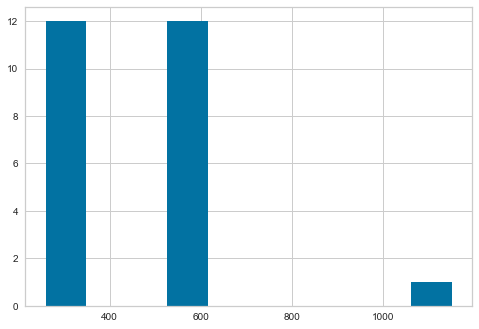

In [190]:
plt.hist(df['ingresos']);

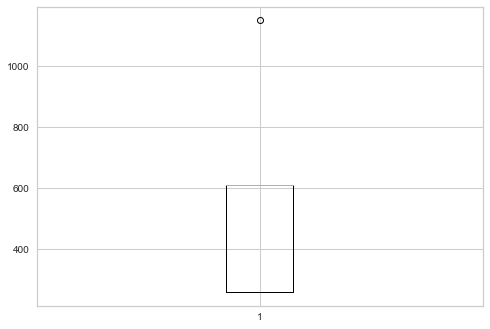

In [194]:
plt.boxplot(df['ingresos']);

In [195]:
df['ingresos'].replace(to_replace=1150.50,value=df.ingresos.mean(),inplace=True)

In [196]:
df['ingresos'].describe()

count     25.000000
mean     436.394400
std      175.343388
min      260.000000
25%      260.000000
50%      463.860000
75%      610.500000
max      610.500000
Name: ingresos, dtype: float64

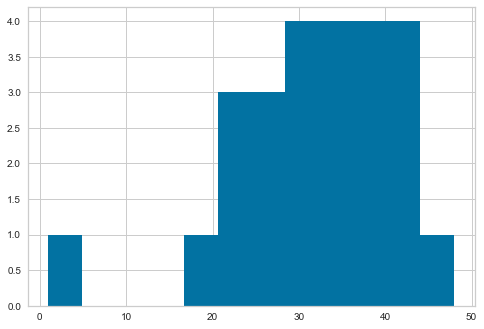

In [182]:
plt.hist(df['edad'],bins=12);

In [185]:
df[df['edad']<10]

,nombres,apellidos,provincia_nacimiento,estudios,ocupación,dirtrabajo,ingresos,ultimocurso,fecha_nacimiento,medio,domicilio,provincia,ciudad,sector,nacionalidad,facebook,fecha_matricula,estado,nombre_curso,edad
10,ESTALIN RAMIRO,CARRERA PADILLA,Pichincha,Universidad,Operativo,NaN,610.5,NaN,2022-10-01,Facebook,Avenida Yolanda Medina. Salcedo,Pichincha,QUITO,CENTRO-SUR,Ecuatoriano,NaN,2022-10-29,Culminado,Enderezada y pintura automotriz,1


We have an outlier about an age of 1. So, we will replace that outlier with average age.

In [188]:
df['edad'].replace(to_replace=1,value=df.edad.mean(),inplace=True)

In [189]:
df[df['edad']<10]

,nombres,apellidos,provincia_nacimiento,estudios,ocupación,dirtrabajo,ingresos,ultimocurso,fecha_nacimiento,medio,domicilio,provincia,ciudad,sector,nacionalidad,facebook,fecha_matricula,estado,nombre_curso,edad


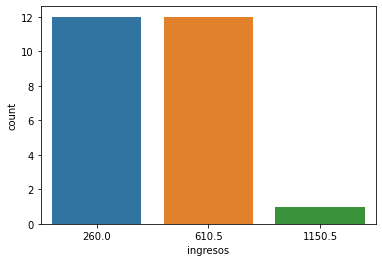

In [55]:
sns.countplot(x=df['ingresos']);

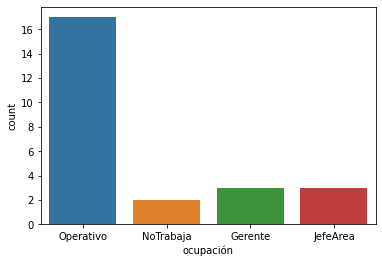

In [56]:
sns.countplot(x=df['ocupación']);

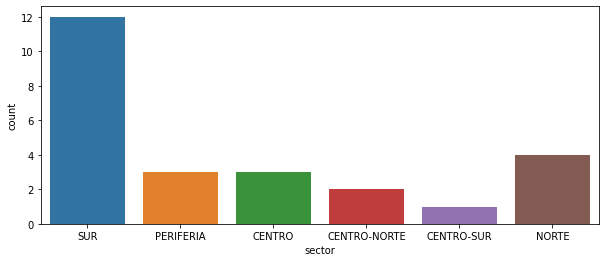

In [57]:
plt.figure(figsize=(10,4))
sns.countplot(x=df['sector']);

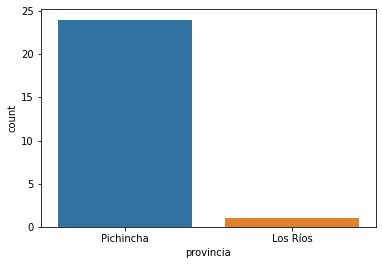

In [58]:
sns.countplot(x=df['provincia']);

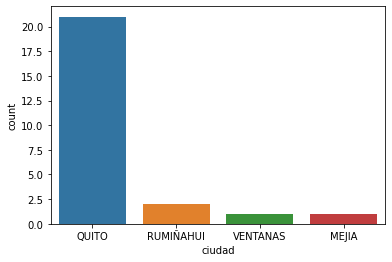

In [59]:
sns.countplot(x=df['ciudad']);

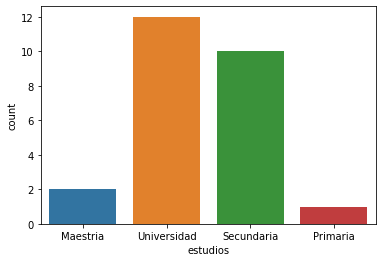

In [60]:
sns.countplot(x=df['estudios']);

In [61]:
df[df['ciudad']=='RUMIÑAHUI']

,nombres,apellidos,provincia_nacimiento,estudios,ocupación,dirtrabajo,ingresos,ultimocurso,fecha_nacimiento,medio,domicilio,provincia,ciudad,sector,nacionalidad,facebook,fecha_matricula,estado,nombre_curso,edad
4,José Luis,Castro Parrales,Pichincha,Universidad,Gerente,Triángulo Av general Enríquez,1150.5,NaN,1980-03-21,Facebook,San Rafael valle de los chillos,Pichincha,RUMIÑAHUI,PERIFERIA,Ecuatoriano,NaN,2022-08-26,Culminado,Enderezada y pintura automotriz,43
21,EDISON PATRICIO,COYAGO LLULLUNA,Pichincha,Secundaria,Operativo,Via amaguania,260.0,NaN,1988-04-13,Facebook,Pintag,Pichincha,RUMIÑAHUI,CENTRO,Ecuatoriano,edison coyago,2023-03-04,Matriculado,Enderezada y pintura automotriz,35


In [62]:
df[df['ciudad']=='VENTANAS']

,nombres,apellidos,provincia_nacimiento,estudios,ocupación,dirtrabajo,ingresos,ultimocurso,fecha_nacimiento,medio,domicilio,provincia,ciudad,sector,nacionalidad,facebook,fecha_matricula,estado,nombre_curso,edad
18,JARO FERNANDO,MINDA MOREIRA,Los Rios,Secundaria,Operativo,Zapotal,260.0,NaN,1998-03-04,Facebook,Zapotal,Los Ríos,VENTANAS,SUR,Ecuatoriano,fernando minda,2023-02-26,Matriculado,Enderezada y pintura automotriz,25


In [63]:
df[df['ciudad']=='MEJIA']

,nombres,apellidos,provincia_nacimiento,estudios,ocupación,dirtrabajo,ingresos,ultimocurso,fecha_nacimiento,medio,domicilio,provincia,ciudad,sector,nacionalidad,facebook,fecha_matricula,estado,nombre_curso,edad
19,WILSON FERNANDO,PERALTA PAREDES,Pichincha,Secundaria,Operativo,Machachi,260.0,NaN,1985-07-25,Facebook,Machachi,Pichincha,MEJIA,CENTRO,Ecuatoriano,wilson peralta,2023-03-04,Matriculado,Enderezada y pintura automotriz,38


In [64]:
df.shape

(25, 20)

In [65]:
df.shape

(25, 20)

## 3) Unsupervised Learning: Customer Segmentation

In [197]:
df2=df.copy()

In [198]:
df2.head(3)

,nombres,apellidos,provincia_nacimiento,estudios,ocupación,dirtrabajo,ingresos,ultimocurso,fecha_nacimiento,medio,domicilio,provincia,ciudad,sector,nacionalidad,facebook,fecha_matricula,estado,nombre_curso,edad
0,Jesy Alexander,Serrano Arteaga,Manabí,Maestria,Operativo,Machala y jorge piedra,610.5,NaN,1987-08-18,PaginaWeb,El elejido,Pichincha,QUITO,SUR,Ecuatoriano,NaN,2022-05-10,Culminado,Enderezada y pintura automotriz,36.0
1,Carlos Daniel,Rivera Lopez,Cotopaxi,Universidad,Operativo,"Sangolquí, Rancho Viejo",610.5,NaN,1981-04-23,PaginaWeb,Avenida Yolanda Medina. Salcedo,Pichincha,QUITO,SUR,Ecuatoriano,NaN,2022-05-21,Culminado,Enderezada y pintura automotriz,42.0
2,Bryan Ariel,Silva Ramirez,Pichincha,Universidad,NoTrabaja,Martha bucaran,260.0,NaN,1996-11-01,Facebook,Martha Buran cela Ibarra,Pichincha,QUITO,SUR,Ecuatoriano,NaN,2022-05-21,Culminado,Enderezada y pintura automotriz,27.0


In [199]:
df2.shape

(25, 20)

In [200]:
df2.drop(labels=['nombres','apellidos','provincia_nacimiento','fecha_nacimiento','domicilio','nacionalidad',
                'fecha_matricula','nombre_curso','facebook','estado','dirtrabajo','ultimocurso',
                'provincia','ciudad'],axis=1,inplace=True)

In [201]:
df2.head()

,estudios,ocupación,ingresos,medio,sector,edad
0,Maestria,Operativo,610.50,PaginaWeb,SUR,36.0
1,Universidad,Operativo,610.50,PaginaWeb,SUR,42.0
2,Universidad,NoTrabaja,260.00,Facebook,SUR,27.0
3,Maestria,Gerente,610.50,PaginaWeb,PERIFERIA,42.0
4,Universidad,Gerente,463.86,Facebook,PERIFERIA,43.0


### 3.1 Unsupervised Learning 

In [202]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to compute distances
from scipy.spatial.distance import cdist

# To suppress the warnings
import warnings
warnings.filterwarnings("ignore")

In [203]:
categorical_columns=['estudios','ocupación','medio','sector']

In [204]:
data_encoded = pd.get_dummies(df2, columns=categorical_columns)
data_encoded.head(2)                              

,ingresos,edad,estudios_Maestria,estudios_Primaria,estudios_Secundaria,estudios_Universidad,ocupación_Gerente,ocupación_JefeArea,ocupación_NoTrabaja,ocupación_Operativo,medio_Facebook,medio_PaginaWeb,sector_CENTRO,sector_CENTRO-NORTE,sector_CENTRO-SUR,sector_NORTE,sector_PERIFERIA,sector_SUR
0,610.5,36.0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
1,610.5,42.0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1


In [205]:
data_encoded.tail(2)  

,ingresos,edad,estudios_Maestria,estudios_Primaria,estudios_Secundaria,estudios_Universidad,ocupación_Gerente,ocupación_JefeArea,ocupación_NoTrabaja,ocupación_Operativo,medio_Facebook,medio_PaginaWeb,sector_CENTRO,sector_CENTRO-NORTE,sector_CENTRO-SUR,sector_NORTE,sector_PERIFERIA,sector_SUR
23,610.5,44.0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0
24,260.0,30.0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0


In [206]:
len(data_encoded.columns)

18

In [207]:
# Apply feature scaling using StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)

Number of Clusters: 1 	Average Distortion: 4.1084337143924365
Number of Clusters: 2 	Average Distortion: 3.625228416022979
Number of Clusters: 3 	Average Distortion: 3.364238390591266
Number of Clusters: 4 	Average Distortion: 3.227328240451517
Number of Clusters: 5 	Average Distortion: 2.9575457324495464
Number of Clusters: 6 	Average Distortion: 2.757738595820245
Number of Clusters: 7 	Average Distortion: 2.4784444753362416
Number of Clusters: 8 	Average Distortion: 2.259280109837212
Number of Clusters: 9 	Average Distortion: 2.019491190144638


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

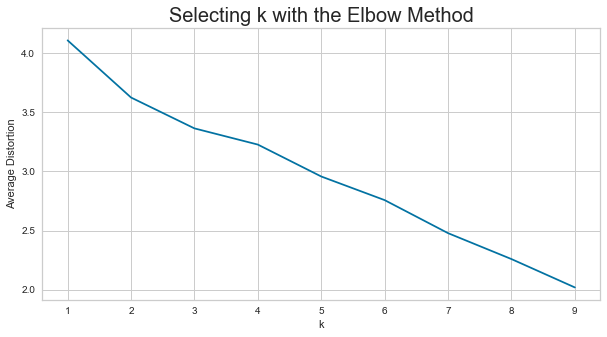

In [208]:
clusters = range(1, 10)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k) #we'll get different value of k
    model.fit(data_scaled)
    prediction = model.predict(data_scaled) #give you the label
    distortion = (
        sum(                              #calculating distances of each cluster and summing
            np.min(cdist(data_scaled, model.cluster_centers_, "euclidean"), axis=1) #it's calculating distance
                #min distance                             #out of any of this points from the cluster centroid, fig 11
        )             #here I will the centroids and distances and the best is the short distance
        / data_scaled.shape[0] #dividing by number of points
    )

    meanDistortions.append(distortion)
    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.figure(figsize=(10, 5))
plt.grid(True)
plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

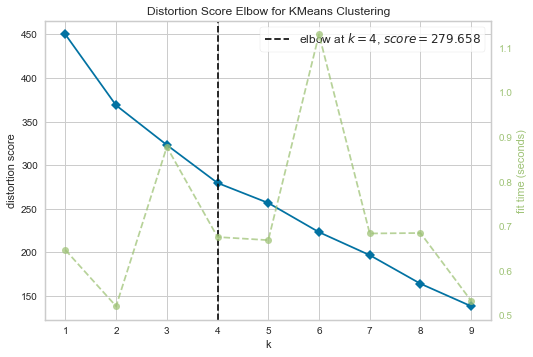

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [209]:
#k_means_df = subset_scaled_df.copy()
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1,10), timings=True) #timings, time to fit
visualizer.fit(data_scaled)
visualizer.show()

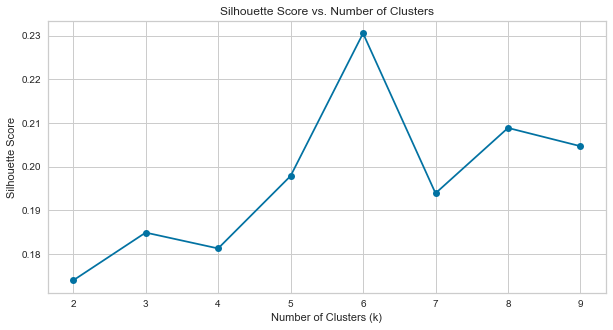

In [210]:
min_clusters=2 
max_clusters=9
silhouette_scores = []

for k in range(min_clusters, max_clusters + 1):
    # Apply k-means clustering
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_scaled)

    # Get silhouette score
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

# Plot the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

cluster-k:  2


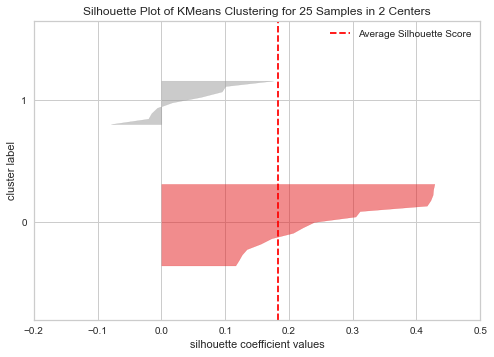

cluster-k:  3


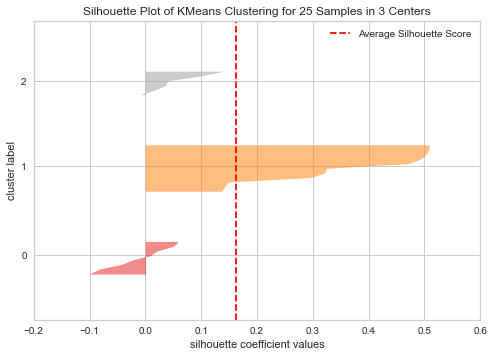

cluster-k:  4


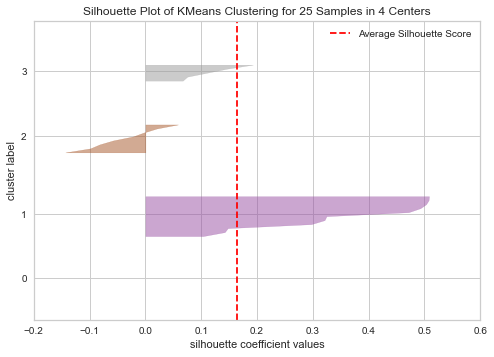

cluster-k:  5


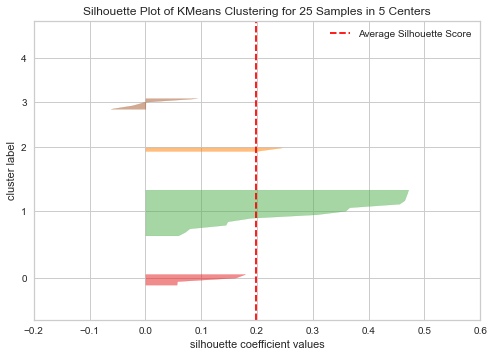

cluster-k:  6


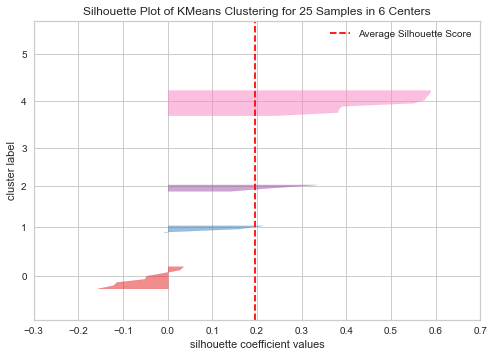

In [78]:
clusters = range(2, 7)
meanDistortions = []

for k in clusters:
    # finding optimal no. of clusters with silhouette coefficients
    print('cluster-k: ',k)
    visualizer = SilhouetteVisualizer(KMeans(k, random_state=1)) #with k clusters
    visualizer.fit(data_scaled);
    visualizer.show();

## k=4

In [211]:
data_scaled.shape

(25, 18)

In [221]:
# Apply k-means clustering
k = 3  # Number of clusters
kmeans2 = KMeans(n_clusters=k)
kmeans2.fit(data_scaled)

KMeans(n_clusters=3)

In [222]:
# Get the cluster labels for each data point
cluster_labels = kmeans2.labels_
len(cluster_labels) #it has 241 predictions in 5 clusters: 0,1,2,3,4

25

In [223]:
kmeans2.inertia_

320.69270347069084

**Data Frame of clusters**

In [224]:
kmeans.cluster_centers_[0:1] #first cluster center

array([[-1.02673835,  1.94261973, -0.29488391,  4.89897949, -0.81649658,
        -0.96076892, -0.36927447, -0.36927447, -0.29488391,  0.68599434,
         0.62360956, -0.62360956, -0.36927447, -0.29488391, -0.20412415,
        -0.43643578, -0.36927447,  1.040833  ]])

In [225]:
cluster_center_df = pd.DataFrame(kmeans.cluster_centers_,columns=data_encoded.columns)
cluster_center_df.head(6) #6 first clusters center

,ingresos,edad,estudios_Maestria,estudios_Primaria,estudios_Secundaria,estudios_Universidad,ocupación_Gerente,ocupación_JefeArea,ocupación_NoTrabaja,ocupación_Operativo,medio_Facebook,medio_PaginaWeb,sector_CENTRO,sector_CENTRO-NORTE,sector_CENTRO-SUR,sector_NORTE,sector_PERIFERIA,sector_SUR
0,-1.026738,1.942620,-0.294884,4.898979,-0.816497,-0.960769,-0.369274,-0.369274,-0.294884,0.685994,0.623610,-0.623610,-0.369274,-0.294884,-0.204124,-0.436436,-0.369274,1.040833
1,-1.026738,-1.132968,-0.294884,-0.204124,1.224745,-0.960769,-0.369274,-0.369274,-0.294884,0.685994,-0.489979,0.489979,-0.369274,-0.294884,-0.204124,2.291288,-0.369274,-0.960769
2,0.503377,-0.544026,-0.294884,-0.204124,-0.816497,1.040833,-0.369274,-0.369274,0.626628,0.150061,0.623610,-0.623610,0.400047,0.626628,-0.204124,-0.436436,-0.369274,0.040032
3,0.728900,0.851986,0.933799,-0.204124,-0.816497,0.373632,2.708013,-0.369274,-0.294884,-1.457738,-0.118783,0.118783,-0.369274,-0.294884,-0.204124,0.472805,1.682250,-0.960769
4,1.013416,0.546608,0.933799,-0.204124,-0.816497,0.373632,-0.369274,-0.369274,-0.294884,0.685994,-1.603567,1.603567,-0.369274,-0.294884,-0.204124,-0.436436,0.656488,0.373632
5,-1.026738,-0.357060,-0.294884,-0.204124,1.224745,-0.960769,-0.369274,-0.369274,-0.294884,0.685994,0.623610,-0.623610,0.509950,-0.294884,-0.204124,-0.436436,-0.369274,0.468947


#### Data Frame of mean of clusters on original data

In [226]:
mean_of_clusters=scaler.inverse_transform(cluster_center_df) #inverse transform
inverse_transform_df = pd.DataFrame(mean_of_clusters,columns=data_encoded.columns)
inverse_transform_df

,ingresos,edad,estudios_Maestria,estudios_Primaria,estudios_Secundaria,estudios_Universidad,ocupación_Gerente,ocupación_JefeArea,ocupación_NoTrabaja,ocupación_Operativo,medio_Facebook,medio_PaginaWeb,sector_CENTRO,sector_CENTRO-NORTE,sector_CENTRO-SUR,sector_NORTE,sector_PERIFERIA,sector_SUR
0,260.000,48.000000,0.000000e+00,1.0,0.000000,0.000000,0.0,0.0,0.000000e+00,1.00,1.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000e+00
1,260.000,24.500000,0.000000e+00,0.0,1.000000,0.000000,0.0,0.0,0.000000e+00,1.00,5.000000e-01,5.000000e-01,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000e+00
2,522.875,29.000000,0.000000e+00,0.0,0.000000,1.000000,0.0,0.0,2.500000e-01,0.75,1.000000e+00,0.000000e+00,0.250000,2.500000e-01,0.000000e+00,0.000000,0.000000,5.000000e-01
3,561.620,39.666667,3.333333e-01,0.0,0.000000,0.666667,1.0,0.0,0.000000e+00,0.00,6.666667e-01,3.333333e-01,0.000000,0.000000e+00,6.938894e-18,0.333333,0.666667,5.551115e-17
4,610.500,37.333333,3.333333e-01,0.0,0.000000,0.666667,0.0,0.0,0.000000e+00,1.00,1.110223e-16,1.000000e+00,0.000000,0.000000e+00,6.938894e-18,0.000000,0.333333,6.666667e-01
5,260.000,30.428571,1.387779e-17,0.0,1.000000,0.000000,0.0,0.0,1.387779e-17,1.00,1.000000e+00,5.551115e-17,0.285714,1.387779e-17,6.938894e-18,0.000000,0.000000,7.142857e-01
6,260.000,22.000000,0.000000e+00,0.0,0.000000,1.000000,0.0,0.0,1.000000e+00,0.00,0.000000e+00,1.000000e+00,0.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
7,610.500,31.920000,0.000000e+00,0.0,0.000000,1.000000,0.0,0.0,0.000000e+00,1.00,1.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000e+00
8,610.500,39.333333,0.000000e+00,0.0,0.333333,0.666667,0.0,1.0,0.000000e+00,0.00,6.666667e-01,3.333333e-01,0.000000,0.000000e+00,6.938894e-18,0.333333,0.000000,6.666667e-01


In [227]:
data_encoded['cluster'] = cluster_labels

In [228]:
data_encoded.groupby('cluster').mean()

,ingresos,edad,estudios_Maestria,estudios_Primaria,estudios_Secundaria,estudios_Universidad,ocupación_Gerente,ocupación_JefeArea,ocupación_NoTrabaja,ocupación_Operativo,medio_Facebook,medio_PaginaWeb,sector_CENTRO,sector_CENTRO-NORTE,sector_CENTRO-SUR,sector_NORTE,sector_PERIFERIA,sector_SUR
cluster,,,,,,,,,,,,,,,,,,
0,291.863636,31.545455,0.000000,0.090909,0.909091,0.000000,0.000000,0.090909,0.000000,0.909091,0.909091,0.090909,0.181818,0.000000,0.000000,0.181818,0.000000,0.636364
1,589.551429,39.285714,0.285714,0.000000,0.000000,0.714286,0.428571,0.142857,0.000000,0.428571,0.285714,0.714286,0.000000,0.000000,0.000000,0.285714,0.428571,0.285714
2,510.357143,29.560000,0.000000,0.000000,0.000000,1.000000,0.000000,0.142857,0.285714,0.571429,0.857143,0.142857,0.142857,0.285714,0.142857,0.000000,0.000000,0.428571


#### Data Frame encoded etiquetado con clusters

In [229]:
data_encoded.head(2)

,ingresos,edad,estudios_Maestria,estudios_Primaria,estudios_Secundaria,estudios_Universidad,ocupación_Gerente,ocupación_JefeArea,ocupación_NoTrabaja,ocupación_Operativo,medio_Facebook,medio_PaginaWeb,sector_CENTRO,sector_CENTRO-NORTE,sector_CENTRO-SUR,sector_NORTE,sector_PERIFERIA,sector_SUR,cluster
0,610.5,36.0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1
1,610.5,42.0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1


In [230]:
data_encoded.drop('cluster',axis=1,inplace=True)

#### Data Frame Original con clusters

In [231]:
#Add the cluster labels to the original dataset
df2['cluster'] = cluster_labels

#Print the clusters
df2.head()

,estudios,ocupación,ingresos,medio,sector,edad,cluster
0,Maestria,Operativo,610.50,PaginaWeb,SUR,36.0,1
1,Universidad,Operativo,610.50,PaginaWeb,SUR,42.0,1
2,Universidad,NoTrabaja,260.00,Facebook,SUR,27.0,2
3,Maestria,Gerente,610.50,PaginaWeb,PERIFERIA,42.0,1
4,Universidad,Gerente,463.86,Facebook,PERIFERIA,43.0,1


In [232]:
df2['cluster'].value_counts()

0    11
1     7
2     7
Name: cluster, dtype: int64

In [233]:
df2.groupby(by='cluster').mean()

,ingresos,edad
cluster,,
0,291.863636,31.545455
1,589.551429,39.285714
2,510.357143,29.560000


In [234]:
for i in range(0,k):
    print("cluster: ",i)
    print(df2[df2['cluster']==i].describe(include='object'))
    print(df2.groupby(by='cluster').mean()[i:i+1])
    print("\n")

cluster:  0
          estudios  ocupación     medio sector
count           11         11        11     11
unique           2          2         2      3
top     Secundaria  Operativo  Facebook    SUR
freq            10         10        10      7
           ingresos       edad
cluster                       
0        291.863636  31.545455


cluster:  1
           estudios  ocupación      medio     sector
count             7          7          7          7
unique            2          3          2          3
top     Universidad  Operativo  PaginaWeb  PERIFERIA
freq              5          3          5          3
           ingresos       edad
cluster                       
1        589.551429  39.285714


cluster:  2
           estudios  ocupación     medio sector
count             7          7         7      7
unique            1          3         2      4
top     Universidad  Operativo  Facebook    SUR
freq              7          4         6      3
           ingresos   edad
cluster

### 3.2 Plotting data

In [235]:
data_scaled_df = pd.DataFrame(data_scaled, columns=data_encoded.columns)
data_scaled_df['cluster'] = cluster_labels
data_scaled_df.head(3)

,ingresos,edad,estudios_Maestria,estudios_Primaria,estudios_Secundaria,estudios_Universidad,ocupación_Gerente,ocupación_JefeArea,ocupación_NoTrabaja,ocupación_Operativo,medio_Facebook,medio_PaginaWeb,sector_CENTRO,sector_CENTRO-NORTE,sector_CENTRO-SUR,sector_NORTE,sector_PERIFERIA,sector_SUR,cluster
0,1.013416,0.372107,3.391165,-0.204124,-0.816497,-0.960769,-0.369274,-0.369274,-0.294884,0.685994,-1.603567,1.603567,-0.369274,-0.294884,-0.204124,-0.436436,-0.369274,1.040833,1
1,1.013416,1.157363,-0.294884,-0.204124,-0.816497,1.040833,-0.369274,-0.369274,-0.294884,0.685994,-1.603567,1.603567,-0.369274,-0.294884,-0.204124,-0.436436,-0.369274,1.040833,1
2,-1.026738,-0.805778,-0.294884,-0.204124,-0.816497,1.040833,-0.369274,-0.369274,3.391165,-1.457738,0.623610,-0.623610,-0.369274,-0.294884,-0.204124,-0.436436,-0.369274,1.040833,2


In [236]:
data_scaled_df.shape

(25, 19)

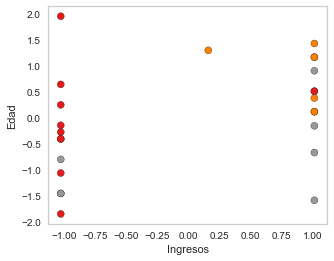

In [237]:
cl_y=data_scaled_df.cluster.tolist()
X1=data_scaled[:,0]
X2=data_scaled[:,1]

plt.figure(figsize=(5,4))
plt.grid();
plt.scatter(X1,X2,c=cl_y, cmap=plt.cm.Set1,edgecolor="k")
plt.xlabel("Ingresos")
plt.ylabel("Edad")
plt.plot();

In [243]:
df2.head()

,estudios,ocupación,ingresos,medio,sector,edad,cluster
0,Maestria,Operativo,610.50,PaginaWeb,SUR,36.0,1
1,Universidad,Operativo,610.50,PaginaWeb,SUR,42.0,1
2,Universidad,NoTrabaja,260.00,Facebook,SUR,27.0,2
3,Maestria,Gerente,610.50,PaginaWeb,PERIFERIA,42.0,1
4,Universidad,Gerente,463.86,Facebook,PERIFERIA,43.0,1


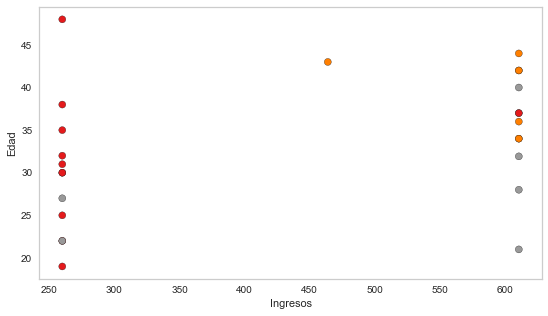

In [239]:
cl_y=df2.cluster.tolist()
X1=df2.ingresos.tolist()
X2=df2.edad.tolist()

plt.figure(figsize=(9,5))
plt.grid();
plt.scatter(X1,X2,c=cl_y, cmap=plt.cm.Set1,edgecolor="k")
plt.xlabel("Ingresos")
plt.ylabel("Edad")
plt.plot();

In [246]:
df2.cluster.value_counts()

0    11
1     7
2     7
Name: cluster, dtype: int64

In [247]:
cluster_dic={'cl0':'rojo','cl1':'naranja','cl2':'plomo'}
cluster_dic

{'cl0': 'rojo', 'cl1': 'naranja', 'cl2': 'plomo'}

### 3.2 Clusters in 3D Plotting

In [272]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components=3).fit_transform(data_scaled)

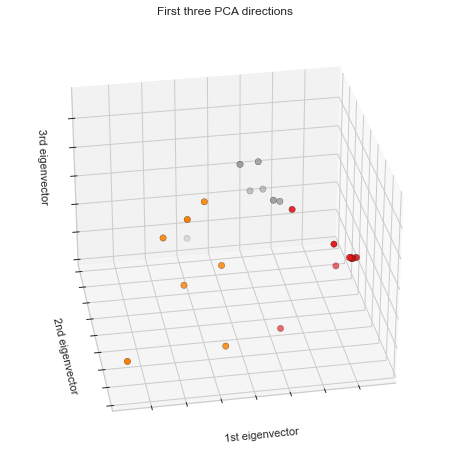

In [284]:
fig = plt.figure(1, figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=100) #elev: elevación, azim: azimut

ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=cl_y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
);

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

## 4) Conclusiones